<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>23010101222 | Kunj Ramoliya</b></center> 

<center><b><h1>Data Cleaning and Preprocessing</b></center>    
<pre>    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kunj/ML-DL/Cardio_ML_Project/data/cardio_train.csv', sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# See the first 11 enteries

In [4]:
df.head(11)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


# See the last 10 enteries

In [5]:
df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(70000, 13)

In [8]:
print("Total number of rows : ", df.shape[0])

Total number of rows :  70000


In [9]:
print("Total number of columns : ", df.shape[1])

Total number of columns :  13


In [10]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
duplicates = df.duplicated().sum()
duplicates
# agar drop karva hoi to:
# df = df.drop_duplicates().reset_index(drop=True)

np.int64(0)

In [14]:
#value counts to get unique values
print('Cardio counts:')
print(df['cardio'].value_counts(), '\n')

print('Gender counts:')
print(df['gender'].value_counts(), '\n')

print('Cholesterol counts:')
print(df['cholesterol'].value_counts(), '\n')

print('Glucose counts:')
print(df['gluc'].value_counts(), '\n')

Cardio counts:
cardio
0    35021
1    34979
Name: count, dtype: int64 

Gender counts:
gender
1    45530
2    24470
Name: count, dtype: int64 

Cholesterol counts:
cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64 

Glucose counts:
gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64 



In [15]:
# gives row labels
df.index

RangeIndex(start=0, stop=70000, step=1)

In [16]:
df.weight.nunique()

287

In [17]:
df['age'].dtypes

dtype('int64')

In [18]:
df['age'].value_counts()

age
19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: count, Length: 8076, dtype: int64

# What is the age with most occurrence?

In [19]:
df.age.value_counts().head()

age
19741    32
18236    32
20376    31
18253    31
20442    31
Name: count, dtype: int64

# What is the age with least occurrence?

In [20]:
df.age.value_counts().tail()

age
19277    1
16493    1
20059    1
23659    1
17926    1
Name: count, dtype: int64

In [21]:

df['height'].value_counts().count()

np.int64(109)

# What is the mean age ?

In [22]:
df.age.mean()

np.float64(19468.865814285713)

In [23]:
df['weight'].min()

np.float64(10.0)

In [24]:
df['weight'].max()

np.float64(200.0)

In [25]:
df['weight'].mean()

np.float64(74.20569)

In [26]:
# pandas allow this syntax because
# pandas allows attribute-style access for columns
df.height.min()

np.int64(55)

In [27]:
df.height.max()

np.int64(250)

In [28]:
df.height.mean()

np.float64(164.35922857142856)

In [29]:
df.gender.nunique()

2

In [30]:
g = df.gender.unique()

In [31]:
for i in g :
    print(i, end=" \n")

2 
1 


In [32]:
# .sum becuz true=1 and false=0 which gives count of true values
# EDA mate segreation of data
a = (df.cholesterol == 1).sum()

In [33]:
print("Normal cholesterol : ", a)

Normal cholesterol :  52385


In [34]:
print("Above Normal cholesterol : ", (df.cholesterol == 2).sum())

Above Normal cholesterol :  9549


In [35]:
print("Well Above Normal cholesterol : ", (df.cholesterol == 3).sum())

Well Above Normal cholesterol :  8066


In [36]:
print("Number of smoker : ", (df.smoke == 1).sum())
print("Number of non-smoker : ", (df.smoke == 0).sum())

Number of smoker :  6169
Number of non-smoker :  63831


In [37]:
print("Number of patient with cardiac arrest : ", (df.cardio == 1).sum())
print("Number of patient without cardiac arrest : ", (df.cardio == 0).sum())

Number of patient with cardiac arrest :  34979
Number of patient without cardiac arrest :  35021


In [38]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [39]:
((df['cardio']==1) &  #has heart disease
 (df['smoke']==0) & # non-smoker
 (df['alco']==1) & # drinks alcohol
 (df['cholesterol']==2)).sum() #has above-normal cholesterol

np.int64(227)

# Pre-Processing

In [40]:
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [41]:
print(df.duplicated().sum())

0


# Convert Age Days --> Years

In [42]:
df['age_years'] = (df['age'] / 365).astype(int)

In [43]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


# Categorize Gender (1 --> Female && 2 --> Male)

In [44]:
df['gender'] = df['gender'].map({1:'Female', 2:'Male'})

In [45]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,Male,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,Female,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,Female,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,Male,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,Female,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,Male,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,Female,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,Male,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,Female,163,72.0,135,80,1,2,0,0,0,1,61


In [46]:
# to remove the extreme outliers
df = df[(df['height'] >= 120) & (df['height'] <= 220)]


In [47]:
df.shape

(69947, 14)

In [48]:
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]
df.shape

(69940, 14)

In [49]:
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]

In [50]:
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 150)]
df.shape

(68682, 14)

# Calculate BMI

In [51]:
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,Male,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,Female,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,Female,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,17623,Male,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,Female,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,Male,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,99995,22601,Female,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,99996,19066,Male,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,22431,Female,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


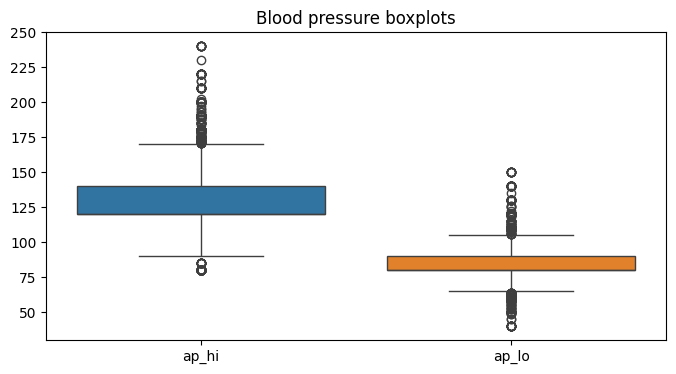

In [52]:
# 3. Blood pressure boxplots (ap_hi, ap_lo)
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['ap_hi', 'ap_lo']])
plt.title('Blood pressure boxplots')
plt.show()

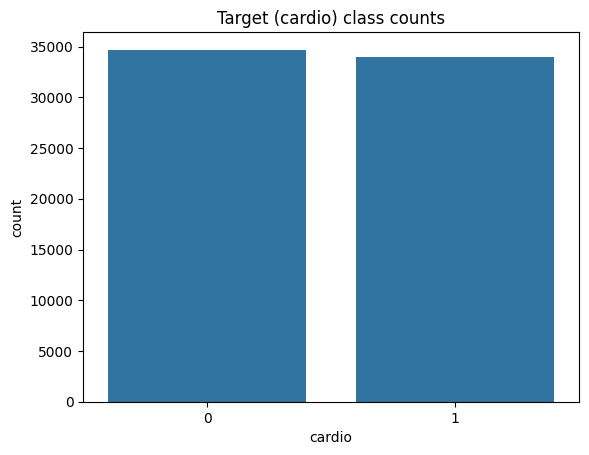

In [53]:
# 4. Target count barplot
sns.countplot(x='cardio', data=df)
plt.title('Target (cardio) class counts')
plt.show()

# Standardized Preprocessing

Encoded Categorical Values

In [54]:
df = pd.get_dummies(
    df,
    columns=['cholesterol', 'gluc'],
    drop_first=True
)

Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
df[num_cols] = scaler.fit_transform(df[num_cols])

Separate Features & Target

In [57]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [58]:
print("Features shape: ", X.shape)
print("Target shape: ", y.shape)

Features shape:  (68682, 16)
Target shape:  (68682,)


Train-Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
# show processed data -> print X_train and Y_train
print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)

X_train:
          id       age  gender    height    weight     ap_hi     ap_lo  smoke  \
14289  20414 -1.955591  Female  0.452992 -0.288233 -1.592468 -2.237953      0   
12776  18226 -1.700296  Female  0.326644  0.970842 -0.396406 -0.141911      0   
4318    6091  0.077043    Male  0.452992  0.131458  0.799656 -0.141911      0   
391      555 -0.521482  Female -2.579341 -1.057668 -0.396406 -0.141911      0   
69890  99830  0.885072    Male  1.084728  0.621099  0.799656  0.906111      0   
...      ...       ...     ...       ...       ...       ...       ...    ...   
37915  54130  0.094468  Female -1.568564  0.691047  1.397687  1.954132      0   
6391    9093 -0.824594    Male -0.052397 -0.568027 -0.396406 -0.141911      1   
55928  79785  0.433646  Female  0.073950  0.061510  0.500640  0.906111      0   
875     1220  1.042707  Female -1.063175 -0.987719  0.201625 -0.141911      0   
16100  22985  0.391907  Female -1.442216 -0.917770 -0.994437 -1.189932      0   

       alco  activ

In [63]:
df.to_csv('/Users/kunj/ML-DL/Cardio_ML_Project/data/cleaned_cardio_data.csv')